# Animation of the Lorenz Model

### Formal Analyses CS51 8.1 - Simulation III: Prediction and Chaos

The following equations represent a simplified model to describe atmospheric convection. For more details on the model, please see [the Wikipedia reading](https://en.wikipedia.org/wiki/Lorenz_system) and the one from [MIT Technology Review](https://www.technologyreview.com/s/422809/when-the-butterfly-effect-took-flight/), as suggested in the reading list for class.

$$ \frac{dx}{dt}=\sigma(y-x) $$
$$ \frac{dy}{dt}=x(\rho-z)-y $$
$$ \frac{dz}{dt}=xy-\beta z $$

For your pre-class work, ensure that you can run the following code and view the animation. Another (more preferred) option for running this simulation is through the python file: [lorenz_animation.py](https://drive.google.com/file/d/1j4aZC46UcpLLNrI9IZ9B-jxj7u0DpLEl/view?usp=sharing). This [document](https://docs.google.com/document/d/1glmLF1DTRITSLXkTxMQoV1bzMg784UXGKGLIKrpOlgY/edit?usp=sharing) contains some tips for getting the animation to run.

**Things to notice and tryout before class**:

1. Notice that the animation has two spheres, one <font color='blue'>**blue**</font> and one <font color='red'>**red**</font>. These represent two possible numerical solutions to the differential equations $(x(t),y(t),z(t))$, and the animation shows these two possible trajectories through the phase space. The only difference between them is their initial conditions $(x(0),y(0),z(0))$. 

2. As you'll see in the code, each trajectory has different initial conditions. You should see that `x1_init`, `y1_init`, and `z_init` are all set to <font color='blue'>**1.5**</font>. For the second trajectory, all initial values are set to <font color='red'>**1.0**</font>. It's interesting to compare the trajectories for slightly different initial values. 

3. Try changing the initial conditions for one of the trajectories in the code, and re-run it. Specifically, try different values for `x1_init`, `y1_init`, and `z_init`. Observe any changes in the behavior of the trajectory in the animation (use values around 1 and 2 to work well with the animation). This will be part of an in-class activity.

Traceback (most recent call last):
  File "C:\Users\Peleg\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\Peleg\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


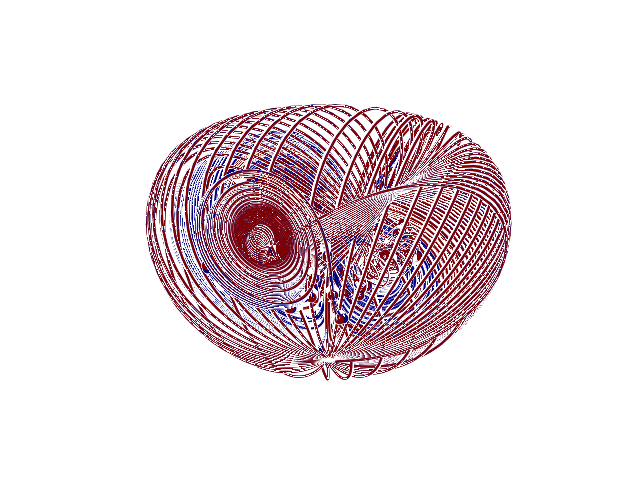

In [2]:
import numpy as np
from scipy import integrate
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

# Two trajectories, labeled 1 (blue) and 2 (red) 
N_trajectories = 2 

# MODIFY THE INITIAL CONDITIONS HERE!
# blue trajectory:
x1_init = 1.1 
y1_init = 1.0
z1_init = 1.0

# red trajectory:
x2_init = 1.01
y2_init = 1.0
z2_init = 1.0

# MODIFY THE PARAMETERS HERE!
sigma = 10
beta = 8./3
rho = 24

def lorentz_deriv(xyz_init, t0):
    # Compute the time-derivatives of a Lorentz system
    x,y,z = xyz_init[0], xyz_init[1], xyz_init[2]
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


# initial values put into an array
x0 = np.array([[x1_init, y1_init, z1_init], [x2_init, y2_init, z2_init]])

# Solve for the trajectories using "odeint" function
t = np.linspace(0, 75, 6000)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1200, interval=30)

plt.show()

Code adapted from [Jake VanderPlas](https://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/)